<a href="https://colab.research.google.com/github/abidshafee/google.colaboratory_projects/blob/master/EURUSD_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Description: This is a program that predict future currency price using artificial recurrent nural network - 
# The artificial recurrent nural network architecture also called 'Long Short Term Memory' or LSTM
# Predicting the closing price of EURUSD currency pair using the past 60 days price.

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [4]:
# geting the eurousd quotes
df = web.DataReader('EURUSD=X', data_source='yahoo', start='2019-07-13', end='2020-7-13')
# view data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-14,1.128599,1.125568,1.127180,1.127205,0,1.127205
2019-07-15,1.126634,1.120900,1.126088,1.126177,0,1.126177
2019-07-16,1.123343,1.120109,1.121328,1.121227,0,1.121227
2019-07-17,1.124733,1.120624,1.122776,1.122965,0,1.122965
2019-07-18,1.127142,1.121504,1.126152,1.126152,0,1.126152
...,...,...,...,...,...,...
2020-07-06,1.133658,1.126037,1.131030,1.131286,0,1.131286
2020-07-07,1.134559,1.126519,1.127281,1.127523,0,1.127523
2020-07-08,1.137268,1.128796,1.133787,1.133915,0,1.133915


In [5]:
# number of rows and column in the dataset
df.shape

(261, 6)

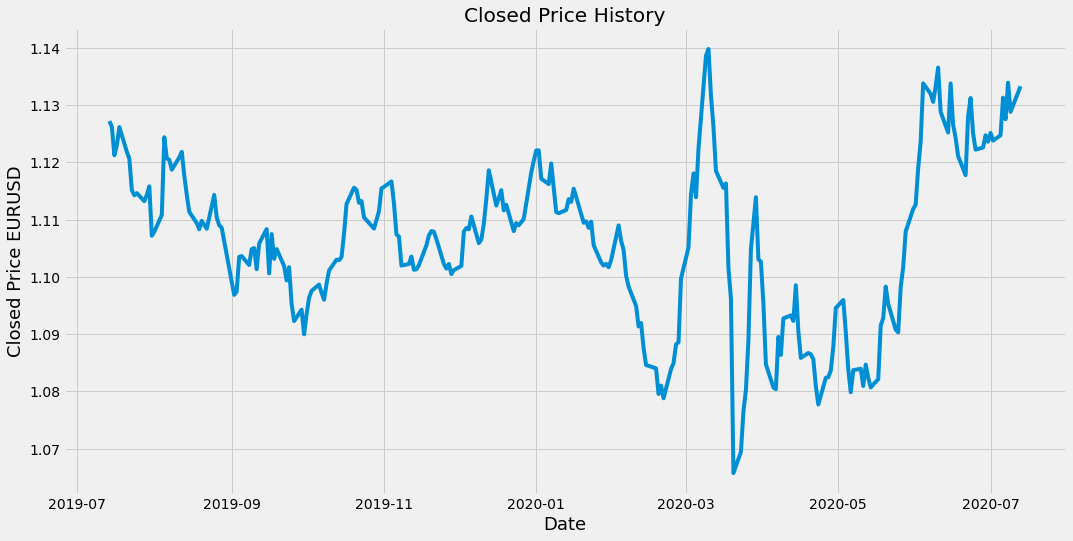

In [6]:
# our dataframe has 260 rows and 6 column except index column
# Visualizing data specially the closing price, because we are gonna built iur model on closed price
plt.figure(figsize = (16,8))
plt.title('Closed Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closed Price EURUSD', fontsize=18)
plt.show()

In [27]:
# creating a new dataframe only with close price column
newdf = df.filter(['Close'])
# now, converting the new dataframe to numpy array
dataset = newdf.values
# dataset.shape
# taking the number of rows to train the model
training_data_len = math.ceil( len(dataset) *0.8)
# using math.ceil to roundup number
training_data_len

209

In [10]:
# Scaling the data before presenting it to the neural network
# because scaling or normalization of input data is always a good practice
scaler = MinMaxScaler(feature_range=(0, 1))
# transform the data to value between 0 and 1
# Scaled_data will hold the data that is been scaled
scaled_data = scaler.fit_transform(dataset)
# scaled_data

In [14]:
# Creating the training dataset
# first we create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# this will capture index 0 to training_data_len and return all column
# now we will split the data into x_train, y_train dataset
x_train = [] # independent data
y_train = [] # dependent data, deends on x_train

for data in range(60, len(train_data)):
  x_train.append(train_data[data-60:data, 0])
  y_train.append(train_data[data,0])
  if data<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.82999422, 0.81610983, 0.74927769, 0.77273759, 0.81576859,
       0.7574287 , 0.74096412, 0.66689201, 0.65498098, 0.66001098,
       0.64108049, 0.65581958, 0.67596371, 0.55953502, 0.5691411 ,
       0.60852154, 0.79183225, 0.74215039, 0.73858996, 0.7154037 ,
       0.74418492, 0.7574287 , 0.70172855, 0.65615438, 0.61602226,
       0.58938663, 0.5749437 , 0.59470635, 0.58523387, 0.57610422,
       0.65581958, 0.60269318, 0.58423753, 0.57859266, 0.54630573,
       0.45157604, 0.42015829, 0.42828515, 0.50988052, 0.51168971,
       0.49050417, 0.5279885 , 0.53062502, 0.48083371, 0.54134978,
       0.57527528, 0.47068841, 0.56350751, 0.50511289, 0.52815268,
       0.48837307, 0.45418681, 0.48542106, 0.39907094, 0.35836259,
       0.3853137 , 0.32717662, 0.37481268, 0.41366195, 0.42942314])]
[0.444564627788429]



In [ ]:
# above the first dataset is our x_training dataset which contains past 60 values,
# and below the single row is our y_training dataset that we will predict depending on 60 values of x_train dataset

In [20]:
# now converting the x_train and y_train dataset to numpy array so that we can use them to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# right now our data is two-dimentional, so we need to reshape the data,
# the reason of reshaping is that the LSTM network expect data to be three dimentional in the form of -
# number of samples, number of time steps, and number of features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(149, 60, 1)

In [22]:
# Building LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
# now we will compile our model
model.compile(optimizer='adam', loss = 'mean_squared_error')
# the optimizer will improve the model upon loss function, and
# the loss function will measure how well the model did on training

In [25]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
149/149 [==============================] - 6s 38ms/step - loss: 0.0201
Epoch 2/5
149/149 [==============================] - 5s 37ms/step - loss: 0.0154
Epoch 3/5
149/149 [==============================] - 6s 37ms/step - loss: 0.0134
Epoch 4/5
149/149 [==============================] - 6s 37ms/step - loss: 0.0102
Epoch 5/5
149/149 [==============================] - 6s 38ms/step - loss: 0.0093


Now We will create a testing dataset

In [28]:
test_data = scaled_data[training_data_len-60: 261, :]
# creating dataset
x_test = []
y_test = dataset[training_data_len:, :]

for tdata in range(60, len(test_data)):
  x_test.append(test_data[tdata-60:tdata, 0])

In [29]:
# Converting the test data to numpy array to use it in LSTM model
x_test = np.array(x_test)

In [32]:
# Reshaping the test data
# because our data is two-dimentional but LSTM model expect data to be three-dimentional shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
# model predicted price
predictions = model.predict(x_test)
# inverse transform the data or we unscaling valuees
predictions = scaler.inverse_transform(predictions)
# here we want the predictions contain the saame dataset that our y_test dataset contains


In [36]:
# evaluating our model using root-mean-square error (rmse) that how accurate the model predict 
# the lower value of rmse indicates a better fit
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

0.002997462566082294

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


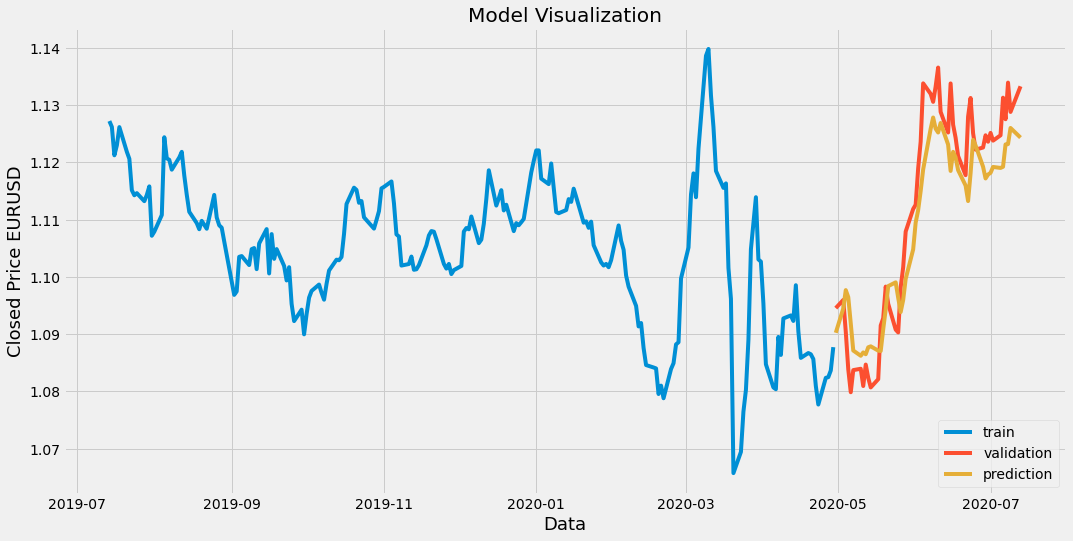

In [39]:
# ploting the data
train = newdf[:training_data_len]
# validation dataset
valid = newdf[training_data_len:]
valid['predictions'] = predictions
# visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model Visualization')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Closed Price EURUSD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['train', 'validation', 'prediction'], loc='lower right')
plt.show()